In [ ]:
from google.colab import files
uploaded = files.upload()


Saving DATASETTT.zip to DATASETTT.zip


In [ ]:
!ls /content


dataset  DATASETTT.zip	sample_data


In [ ]:
!unzip "/content/DATASETTT.zip" -d /content/DATASETTT


Archive:  /content/DATASETTT.zip
   creating: /content/DATASETTT/DATASET/
   creating: /content/DATASETTT/DATASET/clear skin/
  inflating: /content/DATASETTT/DATASET/clear skin/dry_01a2f56b5d6099d2a71a_jpg.rf.f209155b50d6ffa91f31f801cc6ba21e.jpg  
  inflating: /content/DATASETTT/DATASET/clear skin/dry_01e4cad5778a56f9fd14_jpg.rf.10e49585f824fbe07fdfb2494040c228.jpg  
  inflating: /content/DATASETTT/DATASET/clear skin/dry_020920254e34efeff0f5_jpg.rf.28cfa61215bff35ed696dabdc9df585a.jpg  
  inflating: /content/DATASETTT/DATASET/clear skin/dry_0448a21ee50ca17f2abf_jpg.rf.f070bcbcc95ab710ecff3b3e9fb84a79.jpg  
  inflating: /content/DATASETTT/DATASET/clear skin/dry_07167f0fc499ad9cfadf_jpg.rf.d5c98df9201c03a7458a9acfe1338b5a.jpg  
  inflating: /content/DATASETTT/DATASET/clear skin/dry_07364d92affd8d28353e_jpg.rf.9cb9c6e2911a02be6924c7ca0d0aa266.jpg  
  inflating: /content/DATASETTT/DATASET/clear skin/dry_0efdf0ab53ae13958625_jpg.rf.96c2c518c35696cffe002803bcd9e147.jpg  
  inflating: /conten

In [ ]:
!ls /content/DATASETTT/DATASET


'clear skin'  'dark spots'  'puffy eyes'   wrinkles


In [ ]:
DATASET_PATH = "/content/DATASETTT/DATASET"


In [ ]:
import os

for cls in os.listdir(DATASET_PATH):
    cls_path = os.path.join(DATASET_PATH, cls)
    if os.path.isdir(cls_path):
        print(f"{cls}: {len(os.listdir(cls_path))} images")


dark spots: 301 images
wrinkles: 300 images
puffy eyes: 300 images
clear skin: 300 images


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.preprocessing import LabelBinarizer


In [ ]:
classes = []
counts = []

for cls in os.listdir(DATASET_PATH):
    cls_path = os.path.join(DATASET_PATH, cls)
    if os.path.isdir(cls_path):
        classes.append(cls)
        counts.append(len(os.listdir(cls_path)))

# Display class names and counts
for c, count in zip(classes, counts):
    print(f"{c}: {count} images")


dark spots: 301 images
wrinkles: 300 images
puffy eyes: 300 images
clear skin: 300 images


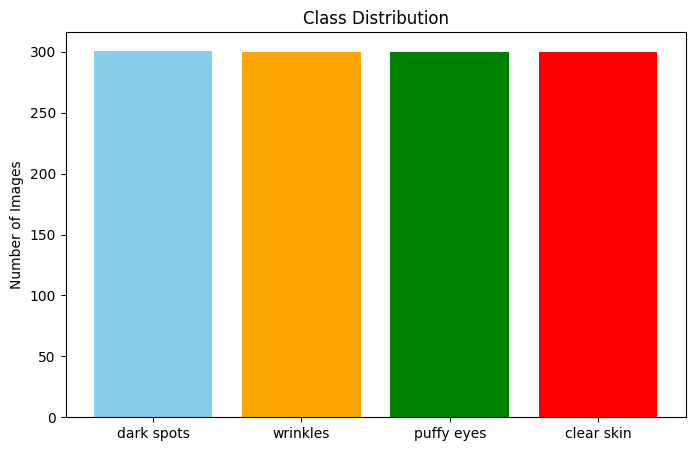

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(classes, counts, color=['skyblue','orange','green','red'])
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
IMG_SIZE = (224, 224)  # Target image size
images = []
labels = []


In [ ]:
for cls in os.listdir(DATASET_PATH):
    cls_path = os.path.join(DATASET_PATH, cls)
    if os.path.isdir(cls_path):
        for img_file in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_file)
            try:
                img = load_img(img_path, target_size=IMG_SIZE)
                img_array = img_to_array(img)/255.0  # Normalize to [0,1]
                images.append(img_array)
                labels.append(cls)
            except Exception as e:
                print(f"Skipped {img_file}: {e}")

images = np.array(images)
labels = np.array(labels)
print(f"Total images loaded: {len(images)}")


Total images loaded: 1201


In [ ]:
lb = LabelBinarizer()
labels_encoded = lb.fit_transform(labels)
print("Classes:", lb.classes_)
print("Sample encoded labels:", labels_encoded[:5])


Classes: ['clear skin' 'dark spots' 'puffy eyes' 'wrinkles']
Sample encoded labels: [[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]


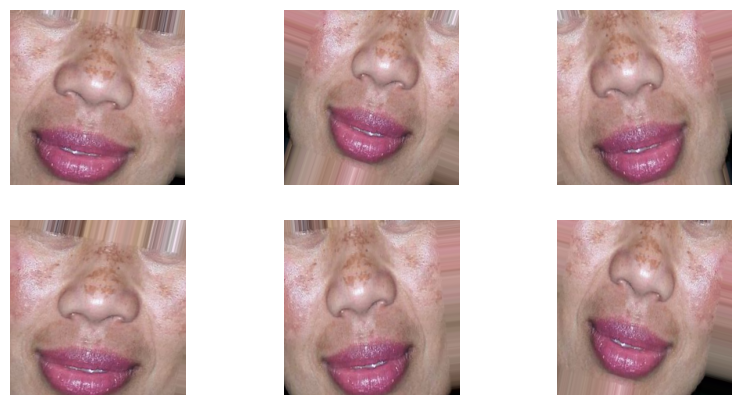

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Visualize some augmented images
sample_img = images[0].reshape((1,224,224,3))
aug_iter = datagen.flow(sample_img, batch_size=1)

plt.figure(figsize=(10,5))
for i in range(6):
    batch = next(aug_iter)
    plt.subplot(2,3,i+1)
    plt.imshow(batch[0])
    plt.axis('off')
plt.show()


In [ ]:
np.save("X_images.npy", images)
np.save("y_labels.npy", labels_encoded)
